<h1> Klasifikasi Data Pelanggan Dealer Dengan Algoritma Bernoulli Naive Bayes </h1>


Oleh:
1. Ismar Apuandi (1301194382)
2. Ashydiki Malik (1301194370) <br>

Kelas : IF-43-06

# 1.Formulasi Masalah
Permasalahan yang dihadapi adalah terdapat sebuah dataset pelanggan di suatu dealer yang didalamnya terdiri dari beberapa kolom yang menunjukkan karakteristik dari masing-masing pelanggan. Dari data tersebut akan dilakukan prediksi apakah pelanggan tertarik untuk membeli kendaraan baru atau tidak. 

# 2.Pembacaan Data 

In [1]:
# Import Essential Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import dataset
df_train = pd.read_csv("../data/kendaraan_train.csv")
df_test = pd.read_csv("../data/kendaraan_test.csv")

In [3]:
# Preview Data Train
df_train.head()

id Jenis_Kelamin  Umur  SIM  Kode_Daerah  Sudah_Asuransi Umur_Kendaraan  \
0   1        Wanita  30.0  1.0         33.0             1.0      < 1 Tahun   
1   2          Pria  48.0  1.0         39.0             0.0      > 2 Tahun   
2   3           NaN  21.0  1.0         46.0             1.0      < 1 Tahun   
3   4        Wanita  58.0  1.0         48.0             0.0      1-2 Tahun   
4   5          Pria  50.0  1.0         35.0             0.0      > 2 Tahun   

  Kendaraan_Rusak    Premi  Kanal_Penjualan  Lama_Berlangganan  Tertarik  
0           Tidak  28029.0            152.0               97.0         0  
1          Pernah  25800.0             29.0              158.0         0  
2           Tidak  32733.0            160.0              119.0         0  
3           Tidak   2630.0            124.0               63.0         0  
4             NaN  34857.0             88.0              194.0         0

In [4]:
# Preview Data test
df_test.head()

Jenis_Kelamin  Umur  SIM  Kode_Daerah  Sudah_Asuransi Umur_Kendaraan  \
0        Wanita    49    1            8               0      1-2 Tahun   
1          Pria    22    1           47               1      < 1 Tahun   
2          Pria    24    1           28               1      < 1 Tahun   
3          Pria    46    1            8               1      1-2 Tahun   
4          Pria    35    1           23               0      1-2 Tahun   

  Kendaraan_Rusak   Premi  Kanal_Penjualan  Lama_Berlangganan  Tertarik  
0          Pernah   46963               26                145         0  
1           Tidak   39624              152                241         0  
2           Tidak  110479              152                 62         0  
3           Tidak   36266              124                 34         0  
4          Pernah   26963              152                229         0

In [5]:
# drop kolom id pada data train karena id hanya menunjukkan unique value tiap baris
df_train.drop(columns = "id", inplace = True)
df_train.head()

Jenis_Kelamin  Umur  SIM  Kode_Daerah  Sudah_Asuransi Umur_Kendaraan  \
0        Wanita  30.0  1.0         33.0             1.0      < 1 Tahun   
1          Pria  48.0  1.0         39.0             0.0      > 2 Tahun   
2           NaN  21.0  1.0         46.0             1.0      < 1 Tahun   
3        Wanita  58.0  1.0         48.0             0.0      1-2 Tahun   
4          Pria  50.0  1.0         35.0             0.0      > 2 Tahun   

  Kendaraan_Rusak    Premi  Kanal_Penjualan  Lama_Berlangganan  Tertarik  
0           Tidak  28029.0            152.0               97.0         0  
1          Pernah  25800.0             29.0              158.0         0  
2           Tidak  32733.0            160.0              119.0         0  
3           Tidak   2630.0            124.0               63.0         0  
4             NaN  34857.0             88.0              194.0         0

# 3.Eksplorasi Data

## 3.1 Informasi Tiap Kolom pada Dataset

In [6]:
# Info jumlah baris dan kolom
print("Jumlah baris : ", df_train.shape[0]) 
print("Jumlah kolom : ", df_train.shape[1]) 

Jumlah baris :  285831
Jumlah kolom :  11


In [7]:
# Melihat Informasi Kolom pada dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      271391 non-null  object 
 1   Umur               271617 non-null  float64
 2   SIM                271427 non-null  float64
 3   Kode_Daerah        271525 non-null  float64
 4   Sudah_Asuransi     271602 non-null  float64
 5   Umur_Kendaraan     271556 non-null  object 
 6   Kendaraan_Rusak    271643 non-null  object 
 7   Premi              271262 non-null  float64
 8   Kanal_Penjualan    271532 non-null  float64
 9   Lama_Berlangganan  271839 non-null  float64
 10  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 24.0+ MB


In [8]:
# Melihat jumlah NaN value tiap kolom
df_train.isna().sum()

Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [9]:
# Melihat jumlah baris data yang duplikat
print("Jumlah data yang duplikat:",df_train.duplicated().sum())

Jumlah data yang duplikat: 169


## 3.2 Identifikasi Jenis Kolom

In [10]:
# Melihat jumlah unik data tiap kolom pada dataset
df_train.nunique()

Jenis_Kelamin            2
Umur                    66
SIM                      2
Kode_Daerah             53
Sudah_Asuransi           2
Umur_Kendaraan           3
Kendaraan_Rusak          2
Premi                45114
Kanal_Penjualan        151
Lama_Berlangganan      290
Tertarik                 2
dtype: int64

In [11]:
# Melihat data unik pada tiap kolom
print("Data unik tiap kolom:\n")
for col in df_train.columns:
    print(col,': ')
    print(df_train[col].unique(),'\n')

Data unik tiap kolom:

Jenis_Kelamin : 
['Wanita' 'Pria' nan] 

Umur : 
[30. 48. 21. 58. 50. 33. 23. 20. 54. 25. nan 66. 31. 24. 22. 52. 26. 46.
 41. 45. 29. 68. 73. 27. 34. 60. 44. 47. 75. 38. 35. 53. 71. 59. 57. 65.
 51. 39. 37. 28. 36. 67. 49. 42. 72. 69. 63. 40. 32. 76. 56. 43. 64. 55.
 61. 80. 78. 70. 74. 62. 77. 79. 82. 81. 85. 84. 83.] 

SIM : 
[ 1. nan  0.] 

Kode_Daerah : 
[33. 39. 46. 48. 35.  8. 28. 29. 14. 12. nan 24. 30. 15.  9. 11. 10. 34.
 16.  3. 36. 47. 49. 38. 43. 44.  6. 41. 37. 31. 26. 18. 13. 20. 45. 50.
 32.  2. 21.  7. 52. 17.  4.  0. 25. 23. 40.  5. 27. 19. 42.  1. 22. 51.] 

Sudah_Asuransi : 
[ 1.  0. nan] 

Umur_Kendaraan : 
['< 1 Tahun' '> 2 Tahun' '1-2 Tahun' nan] 

Kendaraan_Rusak : 
['Tidak' 'Pernah' nan] 

Premi : 
[28029. 25800. 32733. ... 77615. 72125. 52138.] 

Kanal_Penjualan : 
[152.  29. 160. 124.  88. 145.  31.  nan  26. 156. 122.   7. 154.  25.
  12.  11. 151. 133. 157.  30.  13.   1.  52.  23.  14.  16. 163.   4.
 138.  55.   8. 155. 125.  24.  2

Dari observasi tersebut dapat dinyatakan bahwa variabel katogoriknya adalah Jenis_Kelamin, SIM, Kode_Daerah, Sudah_Asuransi, Umur_Kendaraan, Kendaraan_Rusak, Kanal_Penjualan dan Tertarik, karena variabel-variabel tersebut bukan hasil pengukuran atau hanya hasil pelabelan. Sedangkan untuk variabel Umur, Premi, dan Lama_Berlangganan adalah hasil pengukuran atau merupakan nilai numerik.

---



## 3.3 Visualisasi Persebaran Data

In [12]:
# Mendefinisikan kolom numerik
varNum = ["Umur","Premi", "Lama_Berlangganan"]
varCat = ["Jenis_Kelamin", "SIM", "Kode_Daerah", "Sudah_Asuransi", "Umur_Kendaraan", "Kendaraan_Rusak", "Kanal_Penjualan"]

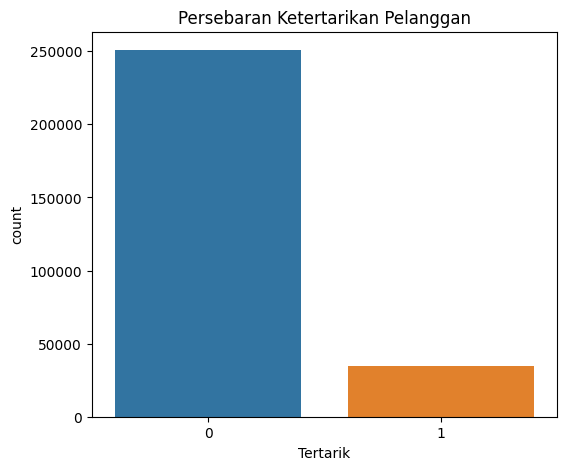

In [13]:
# Melihat persebaran data pada kolom target
plt.figure(figsize = (6,5))
sns.countplot(data = df_train, x = "Tertarik")
plt.title("Persebaran Ketertarikan Pelanggan")
plt.show()

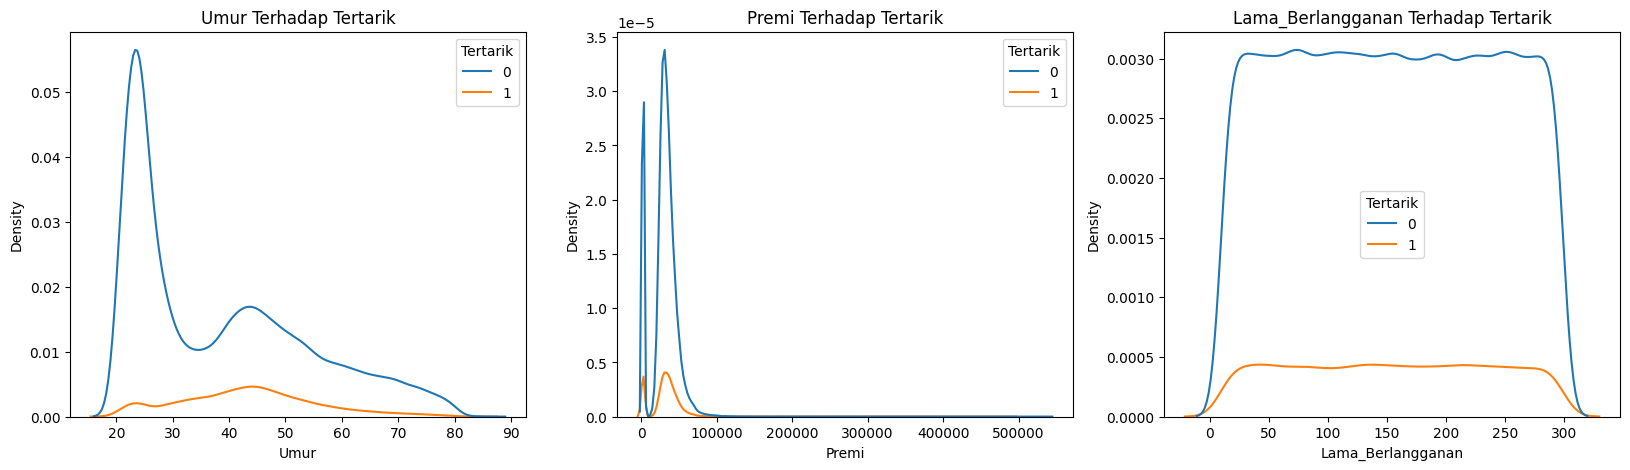

In [14]:
# Melihat persebaran data numerik terhadap kolom target
fig = plt.figure(figsize=(20,17))
for i, var in enumerate(varNum):
    plt.subplot(3,3,i+1)
    sns.kdeplot(data = df_train, x = var, hue = "Tertarik").set_title((var+" Terhadap Tertarik"))

plt.show()

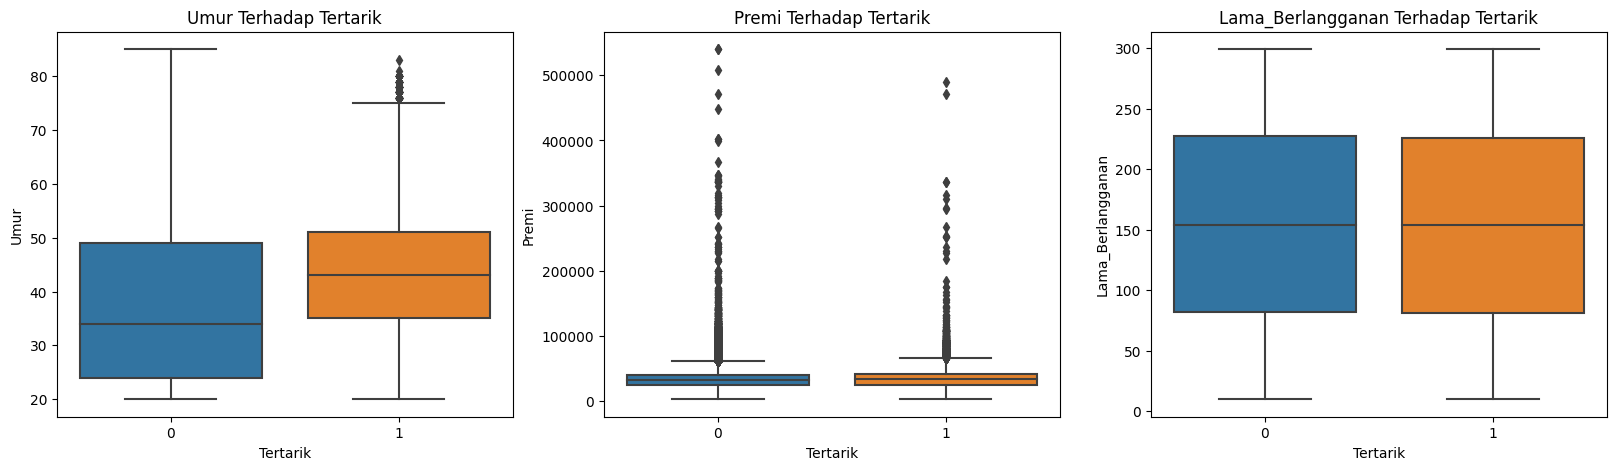

In [15]:
# Melihat boxplot data numerik terhadap kolom target
fig = plt.figure(figsize=(20,17))
for i, var in enumerate(varNum):
    plt.subplot(3,3,i+1)
    sns.boxplot(data = df_train, x = "Tertarik", y = var).set_title((var+" Terhadap Tertarik"))

plt.show()

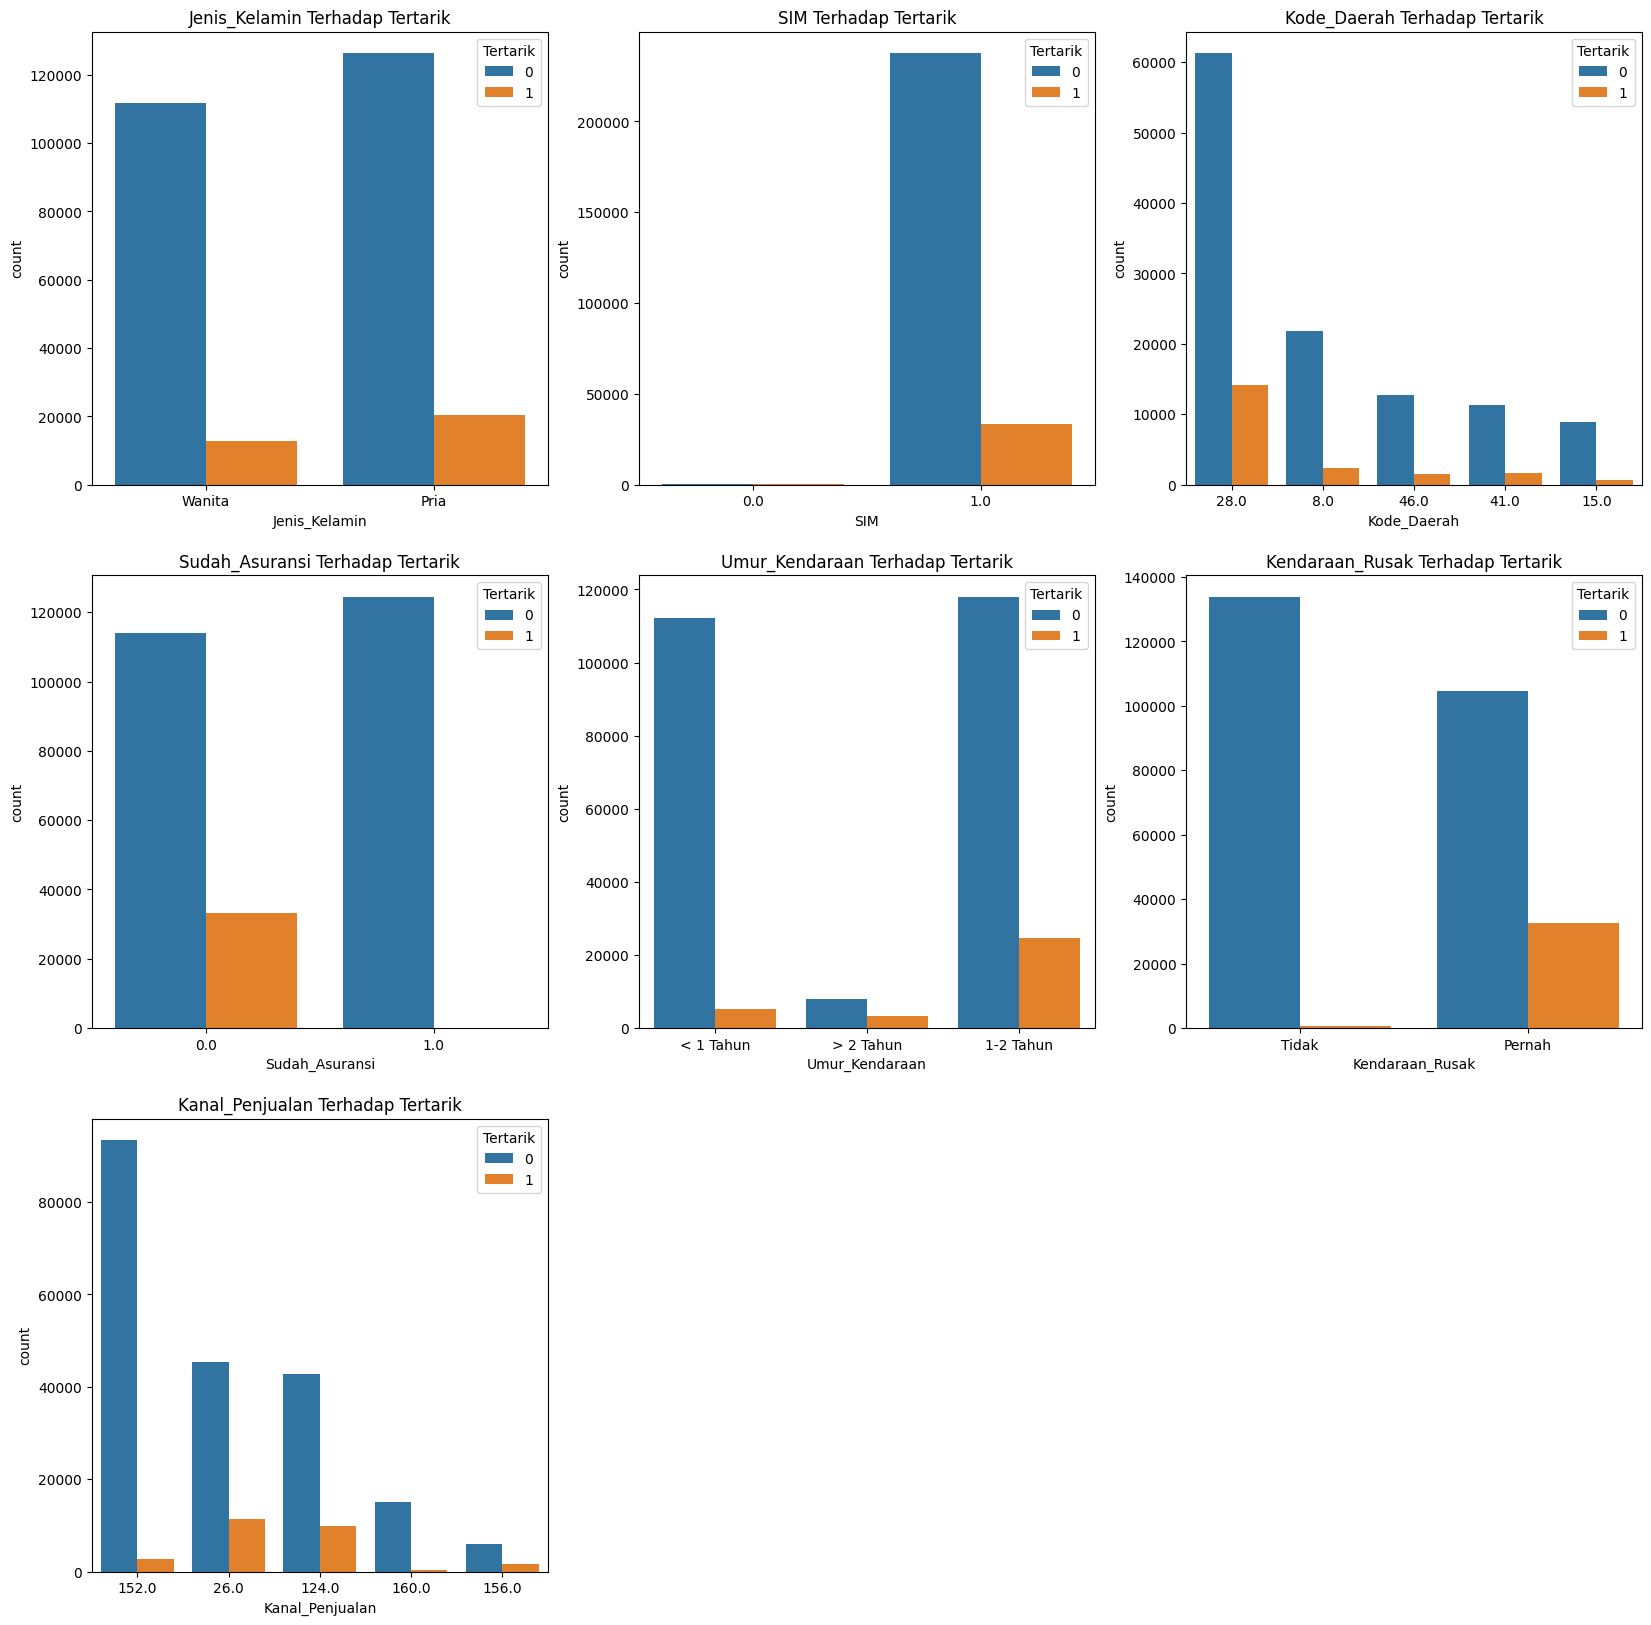

In [16]:
# Melihat persebaran data katogorikal terhadap kolom target
fig = plt.figure(figsize=(20,20))
for i, var in enumerate(varCat):
    plt.subplot(3,3,i+1)
    if(var == "Kode_Daerah" or var == "Kanal_Penjualan"):
      sns.countplot(data = df_train, x = var, hue = "Tertarik", order = df_train[var].value_counts().index[:5]).set_title((var+" Terhadap Tertarik"))
    else:
      sns.countplot(data = df_train, x = var, hue = "Tertarik").set_title((var+" Terhadap Tertarik"))

plt.show()

# 4.Persiapan Data

## 4.1 Seleksi Fitur

In [17]:
# Drop kolom yang tidak berpengaruh terhadap kolom target
''' 
Dari hasil eksplorasi, kolom SIM merupakan kolom yang persebarannya tidak bagus jika dilihat terhadap kolom tertarik, karena hampir semua
data pelanggan baik yang tidak tertarik maupun tertarik sebenarnya sudah mempunyai SIM
'''
to_drop = ["SIM"]
df_train.drop(columns = to_drop, inplace = True)
df_train.head()

Jenis_Kelamin  Umur  Kode_Daerah  Sudah_Asuransi Umur_Kendaraan  \
0        Wanita  30.0         33.0             1.0      < 1 Tahun   
1          Pria  48.0         39.0             0.0      > 2 Tahun   
2           NaN  21.0         46.0             1.0      < 1 Tahun   
3        Wanita  58.0         48.0             0.0      1-2 Tahun   
4          Pria  50.0         35.0             0.0      > 2 Tahun   

  Kendaraan_Rusak    Premi  Kanal_Penjualan  Lama_Berlangganan  Tertarik  
0           Tidak  28029.0            152.0               97.0         0  
1          Pernah  25800.0             29.0              158.0         0  
2           Tidak  32733.0            160.0              119.0         0  
3           Tidak   2630.0            124.0               63.0         0  
4             NaN  34857.0             88.0              194.0         0

## 4.2 Membersihkan Data

In [18]:
# Drop duplicate data
df_train.drop_duplicates(inplace = True, ignore_index=True)
print("Jumlah Baris Data setelah menghapus data duplikat:", df_train.shape[0])

Jumlah Baris Data setelah menghapus data duplikat: 285640


In [19]:
# Mengisi Missing Value pada Kolom Numerik
'''
Dari hasil persebaran data di EDA hanya terdapat 3 kolom yang sifatnya numeric yaitu Umur,Premi dan Lama_Berlangganan. Pengisian missing value dilakukan 
dengan ketentuan sebagai berikut:
1. untuk umur dan premi karena persebarannya tidak seimbang/condong ke salah satu kita gunakan median
2. untuk lama berlangganan karena persebarannya sudah merata kita gunakan mean 
'''
df_train["Umur"] = df_train["Umur"].fillna(df_train["Umur"].median())
df_train["Premi"] = df_train["Premi"].fillna(df_train["Premi"].median())
df_train["Lama_Berlangganan"] = df_train["Lama_Berlangganan"].fillna(df_train["Lama_Berlangganan"].mean())

df_train.isna().sum()

Jenis_Kelamin        14439
Umur                     0
Kode_Daerah          14290
Sudah_Asuransi       14228
Umur_Kendaraan       14275
Kendaraan_Rusak      14187
Premi                    0
Kanal_Penjualan      14297
Lama_Berlangganan        0
Tertarik                 0
dtype: int64

In [20]:
# Mengisi Missing Value pada kolom Katogorikal
'''
karena pada dasarnya atribut Sudah_Asuransi, Umur_Kendaraan, Kendaraan_Rusak, Kanal_Penjualan, Kode_Daerah, Jenis_Kelamin dikategorikan sebagai 
data kategorikal karena merupakan hasil pelabelan bukan pengukuran maka data tersebut dikategorikan data kategorikal(nominal) sehingga untuk
mengisi missing value bisa menggunakan nilai modus
'''

categoric = ["Sudah_Asuransi", "Umur_Kendaraan", "Kendaraan_Rusak", "Kanal_Penjualan", "Kode_Daerah", "Jenis_Kelamin"]
for col in categoric:
  if(col != "Tertarik"):
    df_train[col] = df_train[col].fillna(df_train[col].mode()[0])

df_train.isna().sum()

Jenis_Kelamin        0
Umur                 0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [21]:
# Treatment Outlier
'''
dari hasil EDA dan pemilihan fitur, masih terdapat kolom yang memiliki outlier yaitu Premi, sehingga disini kita 
akan mencoba menghilangkan outlier yang ada 
'''

# Fungsi untuk menghandle outlier pada data
def handleOutlier(df, attribute):
    Q1 = df[attribute].quantile(0.25)
    Q3 = df[attribute].quantile(0.75)
    IQR = Q3 - Q1

    # ganti outlier dengan Q1 atau Q3
    df.loc[df[attribute]>(Q3+1.5*IQR),attribute] = Q3
    df.loc[df[attribute]<(Q1-1.5*IQR),attribute] = Q1
    
    return df

# Menghilangkan Outlier pada premi
df_train = handleOutlier(df_train, 'Premi')

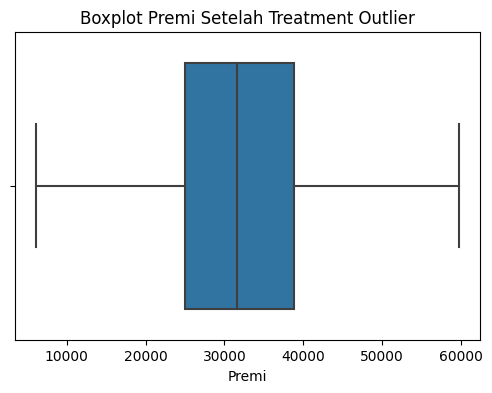

In [22]:
# Melihat kembali outlier pada atribute Premi pada boxplot
plt.figure(figsize = (6,4))
sns.boxplot(data = df_train, x = "Premi")
plt.title("Boxplot Premi Setelah Treatment Outlier")
plt.show()

In [23]:
# Eksport data bersih hasil preprocessing
df_bersih = df_train.copy()  
df_bersih.to_csv('../result/Preprocess_Klasifikasi.csv',index=False)

In [24]:
df_bersih.head()

Jenis_Kelamin  Umur  Kode_Daerah  Sudah_Asuransi Umur_Kendaraan  \
0        Wanita  30.0         33.0             1.0      < 1 Tahun   
1          Pria  48.0         39.0             0.0      > 2 Tahun   
2          Pria  21.0         46.0             1.0      < 1 Tahun   
3        Wanita  58.0         48.0             0.0      1-2 Tahun   
4          Pria  50.0         35.0             0.0      > 2 Tahun   

  Kendaraan_Rusak    Premi  Kanal_Penjualan  Lama_Berlangganan  Tertarik  
0           Tidak  28029.0            152.0               97.0         0  
1          Pernah  25800.0             29.0              158.0         0  
2           Tidak  32733.0            160.0              119.0         0  
3           Tidak  24939.0            124.0               63.0         0  
4          Pernah  34857.0             88.0              194.0         0

# 5.Modeling: Naive Bayes

## 5.1 Fungsi Train untuk Membuat Tabel Probabilitas

In [25]:
def bernoulli_train(X, y):
  # inisialisasi table baru
  prob_table = {}

  # Menentukan value dari kolom target(label)
  value_counts = y.value_counts().sort_index()
  prob_table["label_names"] = value_counts.index.to_numpy()
  prob_table["label_probability"] = (value_counts.values/value_counts.sum())

  # Menghitung peluang tiap value pada tiap kolom 
  for feature in X.columns:
    prob_table[feature] = {}

    # Menghitung jumlah berdasarkan kolom target
    counts = pd.concat([X,y], axis = 1).groupby(y.name)[feature].value_counts()
    df_counts = counts.unstack(y.name)

    # Laplacian Correction untuk menghindari probability 0
    if df_counts.isna().any(axis=None):
      df_counts.fillna(value=0, inplace=True)
      df_counts += 1

    # Menghitung Probabilitas tiap data pada dataset
    df_probabilities = df_counts / df_counts.sum()
    for value in df_probabilities.index:
      # Menambahkan hasil ke dalam Tabel
      probabilities = df_probabilities.loc[value].to_numpy()
      prob_table[feature][value] = probabilities

  return prob_table

## 5.2 Fungsi Proses Prediksi

In [26]:
def bernoulli_predict(row, lookup_table):
  predicted_class = lookup_table["label_probability"]

  # Hitung probabilitas tiap data berdasarkan tabel probabilitas
  for feature in row.index:
    # Try expecpt : Handle key Error akibat value tidak terdapat pada tabel
    try:
      value = row[feature]
      probabilities = lookup_table[feature][value]
      predicted_class = predicted_class * probabilities
    except KeyError:
      continue

  # Ambil nilai maksimal dari hasil perhitungan probabilitas (Map Rule)
  idx_max_class = predicted_class.argmax()

  # Jadikan nilai maksimal sebagai hasil prediksi label
  predict_result = lookup_table["label_names"][idx_max_class]
  
  return predict_result

## 5.3 Melakukan Training dan Testing Dataset

In [27]:
# Fungsi Split dataset
def split_data(train, test, target_column):
  # Split data train yang sudah bersih menjadi X dan Y
  X_train = train.loc[:, train.columns != target_column]
  y_train = train.loc[:, target_column]

  # Split data test (data aktual) menjadi X dan Y
  X_test = test.loc[:, X_train.columns]
  y_test = test.loc[:, target_column]

  return X_train, y_train, X_test, y_test

In [28]:
# Split dataset
X_train, y_train, X_test, y_test = split_data(df_bersih, df_test, "Tertarik")

In [29]:
# Membuat table probability

probability_table = bernoulli_train(X_train, y_train)
print(probability_table)

{'label_names': array([0, 1], dtype=int64), 'label_probability': array([0.87747164, 0.12252836]), 'Jenis_Kelamin': {'Pria': array([0.55421898, 0.63178948]), 'Wanita': array([0.44578102, 0.36821052])}, 'Umur': {20.0: array([0.01709166, 0.00347925]), 21.0: array([0.04479332, 0.01197776]), 22.0: array([0.05742959, 0.01619849]), 23.0: array([0.06686291, 0.01768145]), 24.0: array([0.07083568, 0.01896478]), 25.0: array([0.056225  , 0.01502923]), 26.0: array([0.0368119 , 0.00992443]), 27.0: array([0.02946467, 0.00938258]), 28.0: array([0.02374485, 0.01300442]), 29.0: array([0.01898232, 0.01531442]), 30.0: array([0.0156278 , 0.01611293]), 31.0: array([0.01303913, 0.01808071]), 32.0: array([0.01159521, 0.01825182]), 33.0: array([0.01127212, 0.02190218]), 34.0: array([0.01087325, 0.02141737]), 35.0: array([0.01090516, 0.02215885]), 36.0: array([0.06090775, 0.07206616]), 37.0: array([0.01182655, 0.02367033]), 38.0: array([0.01235705, 0.02660773]), 39.0: array([0.01469843, 0.02786254]), 40.0: arra

In [30]:
# Prediksi hasil train dengan data test
predicted = X_test.apply(bernoulli_predict, axis=1, args=(probability_table,))
predicted.head()

0    1
1    0
2    0
3    0
4    0
dtype: int64

## 5.4 Melakukan Evaluasi 

In [31]:
# Fungsi Membuat Confusion Matrix
def confused_matrix(actual, predicted):
  cm = np.zeros(4).reshape(2,2)
  for act, pred in zip(actual, predicted):
    cm[act][pred] += 1
  
  return cm 

# Fungsi Menghitung Score berdasarkan confusion matrix
def classification_score(conf_matrix, method = "accuracy"):
  # Menentukan True Positive, False Positive, True Negative, dan False Negative
  TP,FP,TN,FN = conf_matrix[1][1], conf_matrix[0][1], conf_matrix[0][0], conf_matrix[1][0]
  
  # Menghitung Skor
  if(method == "accuracy"):
    return (TP+TN)/(TP+FP+TN+FN)
  elif(method == "recall"):
    return TP/(TP+FN)
  elif(method == "precision"):
    return TP/(TP+FP)
    

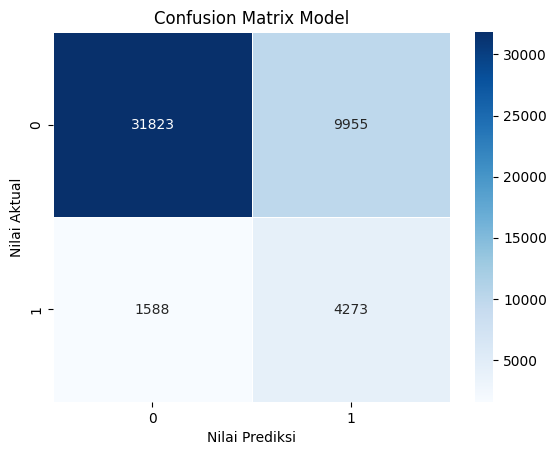

In [32]:
# Membuat Confusion Matriks
cm = confused_matrix(y_test.values, predicted.values) 
sns.heatmap(cm, cmap="Blues", linewidths=.5, annot = True, fmt = "g")
plt.title("Confusion Matrix Model")
plt.xlabel("Nilai Prediksi")
plt.ylabel("Nilai Aktual")
plt.show()

In [33]:
# Menghitung Skor 
print("Naive Bayes Accuracy: ", classification_score(cm, method = "accuracy"))
print("Naive Bayes recall: ", classification_score(cm, method = "recall"))
print("Naive Bayes precision: ", classification_score(cm, method = "precision"))

Naive Bayes Accuracy:  0.7576985243183106
Naive Bayes recall:  0.7290564750042655
Naive Bayes precision:  0.30032330615687375


# 6.Eksperimen

## 6.1 Oversampling Data

In [34]:
'''
Dari hasil eksplorasi di awal, persebaran kelas tertarik dan tidak tertarik tidak begitu seimbang, sehingga dari hasil observasi
tersebut akan dilakukan resampling data agar data menjadi seimbang. Adapun teknik yang digunakan adalah oversampling agar dapat
menghindari banyak data yang terbuang
'''

# Fungsi oversampling data
def samplingData(df, target):
  # Hitung Kelas Label
  count_class_0, count_class_1 = df[target].value_counts()

  # Bagi Data jadi 2 berdasarkan Kelas label
  df_class_0 = df[df[target] == 0]
  df_class_1 = df[df[target] == 1]

  # over sample kelas tertarik
  df_class_1_over = df_class_1.sample(count_class_0, replace = True)
  df_over_sampled = pd.concat([df_class_0, df_class_1_over], axis=0, ignore_index = True)

  return df_over_sampled

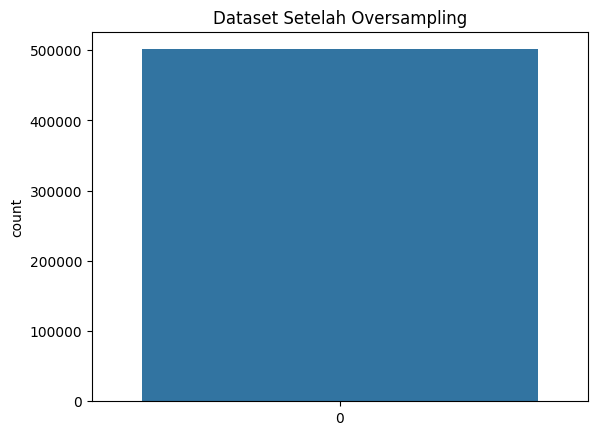

In [35]:
# Melakukan oversampling pada data train yang sudah bersih
df_train_resampled = samplingData(df_bersih.copy(), "Tertarik")

# Visualisasi Hasil undersampling
sns.countplot(df_train_resampled["Tertarik"])
plt.title("Dataset Setelah Oversampling")
plt.show()

In [36]:
# Split dataset hasil resample
X_train, y_train, X_test, y_test = split_data(df_train_resampled, df_test, "Tertarik")

In [37]:
# Membuat table probability

table_exp = bernoulli_train(X_train, y_train)
print(table_exp)

{'label_names': array([0, 1], dtype=int64), 'label_probability': array([0.5, 0.5]), 'Jenis_Kelamin': {'Pria': array([0.55421898, 0.63158063]), 'Wanita': array([0.44578102, 0.36841937])}, 'Umur': {20.0: array([0.01709166, 0.00349013]), 21.0: array([0.04479332, 0.01182257]), 22.0: array([0.05742959, 0.01627797]), 23.0: array([0.06686291, 0.01800508]), 24.0: array([0.07083568, 0.01911793]), 25.0: array([0.056225  , 0.01494972]), 26.0: array([0.0368119 , 0.00960883]), 27.0: array([0.02946467, 0.00938546]), 28.0: array([0.02374485, 0.01293143]), 29.0: array([0.01898232, 0.01548421]), 30.0: array([0.0156278 , 0.01625802]), 31.0: array([0.01303913, 0.0182803 ]), 32.0: array([0.01159521, 0.01810081]), 33.0: array([0.01127212, 0.02210947]), 34.0: array([0.01087325, 0.02131572]), 35.0: array([0.01090516, 0.02257217]), 36.0: array([0.06090775, 0.07208016]), 37.0: array([0.01182655, 0.02346564]), 38.0: array([0.01235705, 0.02637342]), 39.0: array([0.01469843, 0.02787317]), 40.0: array([0.01617027,

In [38]:
# Prediksi hasil train dengan data test
predicted_exp = X_test.apply(bernoulli_predict, axis=1, args=(table_exp,))
predicted_exp.head()

0    1
1    0
2    0
3    0
4    1
dtype: int64

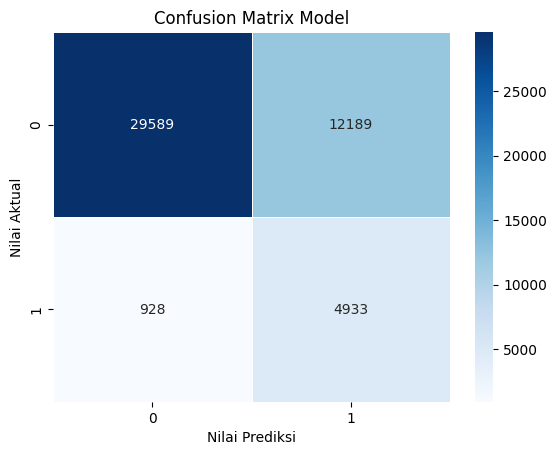

In [39]:
# Membuat Confusion Matriks 
cm_exp = confused_matrix(y_test.values, predicted_exp.values) 
sns.heatmap(cm_exp, cmap="Blues", linewidths=.5, annot = True, fmt = "g")
plt.title("Confusion Matrix Model")
plt.xlabel("Nilai Prediksi")
plt.ylabel("Nilai Aktual")
plt.show()

In [40]:
# Menghitung Skor 
print("Naive Bayes Accuracy: ", classification_score(cm_exp, method = "accuracy"))
print("Naive Bayes recall: ", classification_score(cm_exp, method = "recall"))
print("Naive Bayes precision: ", classification_score(cm_exp, method = "precision"))

Naive Bayes Accuracy:  0.7246583681437477
Naive Bayes recall:  0.8416652448387647
Naive Bayes precision:  0.28810886578670714


## 6.2 Feature Engineering

In [41]:
# Melihat Statistika descriptive data train hasil resample
df_train_resampled.describe()

Umur    Kode_Daerah  Sudah_Asuransi          Premi  \
count  501282.000000  501282.000000   501282.000000  501282.000000   
mean       40.568997      26.634361        0.249568   33542.069997   
std        14.031906      12.335980        0.432763    8642.305230   
min        20.000000       0.000000        0.000000    6098.000000   
25%        28.000000      18.000000        0.000000   25162.000000   
50%        40.000000      28.000000        0.000000   31652.000000   
75%        50.000000      33.000000        0.000000   38852.000000   
max        85.000000      52.000000        1.000000   59719.000000   

       Kanal_Penjualan  Lama_Berlangganan  Tertarik  
count    501282.000000      501282.000000  501282.0  
mean        105.620609         153.972889       0.5  
std          55.544023          81.567070       0.5  
min           1.000000          10.000000       0.0  
25%          26.000000          85.000000       0.0  
50%         124.000000         154.282006       0.5  
75%         152.000000         222.000000       1.0  
max         163.000000         299.000000       1.0

In [42]:
# Fungsi Melakukuan Fitur Engineering 
def ft_engineering(data,column):
  # Mengambil nilai asli tiap data
  actualVal = data[column]

  # Membagi kriteria Menjadi 3 bagian
  if(column == "Umur"):
    criteria = [actualVal.between(0, 30), actualVal.between(30, 50), actualVal.between(50, np.inf)]
    values = ["< 30 Tahun", "30-50 Tahun", "> 50 Tahun"]
  elif(column == "Premi"):
    criteria = [actualVal.between(0, 25000), actualVal.between(25000, 40000), actualVal.between(40000, np.inf)]
    values = ["Rendah", "Sedang", "Tinggi"]
  else:
    # Asumsi minggu menjadi Tahun
    criteria = [actualVal.between(0, 85), actualVal.between(85, 223), actualVal.between(223, np.inf)]
    values = ["< 2 Tahun", "2-4 Tahun", "> 4 Tahun"]

  # Apply kriteria
  newValue = np.select(criteria, values, 0)
  data[column] = newValue

In [43]:
# Bagi range Umur, Premi dan Lama_Berlangganan pada data train menjadi 3 kriteria
ft_engineering(df_train_resampled, "Umur")
ft_engineering(df_train_resampled, "Premi")
ft_engineering(df_train_resampled, "Lama_Berlangganan")

In [44]:
# Hasil Feature Engineering pada data train
df_train_resampled.head()

Jenis_Kelamin         Umur  Kode_Daerah  Sudah_Asuransi Umur_Kendaraan  \
0        Wanita   < 30 Tahun         33.0             1.0      < 1 Tahun   
1          Pria  30-50 Tahun         39.0             0.0      > 2 Tahun   
2          Pria   < 30 Tahun         46.0             1.0      < 1 Tahun   
3        Wanita   > 50 Tahun         48.0             0.0      1-2 Tahun   
4          Pria  30-50 Tahun         35.0             0.0      > 2 Tahun   

  Kendaraan_Rusak   Premi  Kanal_Penjualan Lama_Berlangganan  Tertarik  
0           Tidak  Sedang            152.0         2-4 Tahun         0  
1          Pernah  Sedang             29.0         2-4 Tahun         0  
2           Tidak  Sedang            160.0         2-4 Tahun         0  
3           Tidak  Rendah            124.0         < 2 Tahun         0  
4          Pernah  Sedang             88.0         2-4 Tahun         0

In [45]:
# Apply Kolom Umur, Premi dan Lama_Berlangganan pada data test menjadi 3 kriteria
ft_engineering(df_test, "Umur")
ft_engineering(df_test, "Premi")
ft_engineering(df_test, "Lama_Berlangganan")

In [46]:
# Split dataset hasil feature engineering
X_train, y_train, X_test, y_test = split_data(df_train_resampled, df_test, "Tertarik")

In [47]:
# Melakukan proses training lagi
col = ["Umur", "Sudah_Asuransi", "Umur_Kendaraan", "Kendaraan_Rusak","Kanal_Penjualan", "Kode_Daerah"]
table_exp_2 = bernoulli_train(X_train.loc[:, col ], y_train)
print(table_exp_2)

{'label_names': array([0, 1], dtype=int64), 'label_probability': array([0.5, 0.5]), 'Umur': {'30-50 Tahun': array([0.34324791, 0.61039495]), '< 30 Tahun': array([0.43794112, 0.14732626]), '> 50 Tahun': array([0.21881097, 0.2422788 ])}, 'Sudah_Asuransi': {0.0: array([0.5037444 , 0.99711939]), 1.0: array([0.4962556 , 0.00288061])}, 'Umur_Kendaraan': {'1-2 Tahun': array([0.52051739, 0.7551079 ]), '< 1 Tahun': array([0.44735299, 0.14829577]), '> 2 Tahun': array([0.03212962, 0.09659633])}, 'Kendaraan_Rusak': {'Pernah': array([0.46643207, 0.98087703]), 'Tidak': array([0.53356793, 0.01912297])}, 'Kanal_Penjualan': {1.0: array([0.00289483, 0.00068981]), 2.0: array([1.19621041e-05, 2.39242081e-05]), 3.0: array([0.0010407 , 0.00324572]), 4.0: array([0.00114039, 0.00183419]), 6.0: array([1.19621041e-05, 3.98736802e-06]), 7.0: array([0.00400332, 0.00380395]), 8.0: array([0.00394749, 0.00275527]), 9.0: array([0.00042665, 0.00043064]), 10.0: array([0.00065792, 0.00102874]), 11.0: array([0.00314603, 

In [48]:
# prediksi hasil training dengan data test
predicted_exp_2 = X_test.loc[:, col ].apply(bernoulli_predict, axis=1, args=(table_exp_2,))
predicted_exp_2.head()

0    1
1    0
2    0
3    0
4    1
dtype: int64

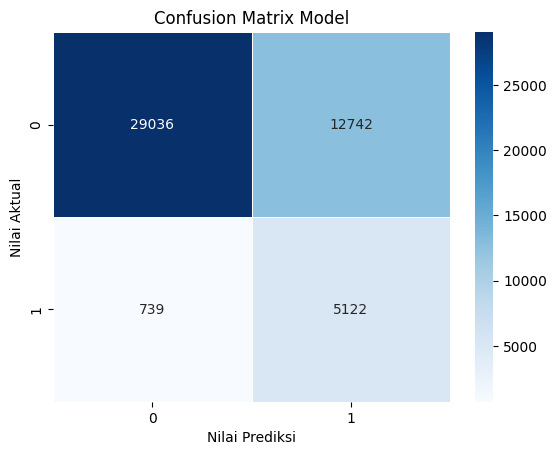

In [49]:
# Membuat Confusion Matriks
cm_eks_2 = confused_matrix(y_test.values, predicted_exp_2.values) 
sns.heatmap(cm_eks_2, cmap="Blues", linewidths=.5, annot = True, fmt = "g")
plt.title("Confusion Matrix Model")
plt.xlabel("Nilai Prediksi")
plt.ylabel("Nilai Aktual")
plt.show()

In [50]:
# Menghitung Skor
print("Naive Bayes Accuracy: ", classification_score(cm_eks_2, method = "accuracy"))
print("Naive Bayes recall: ", classification_score(cm_eks_2, method = "recall"))
print("Naive Bayes precision: ", classification_score(cm_eks_2, method = "precision"))

Naive Bayes Accuracy:  0.7170175696383215
Naive Bayes recall:  0.8739123016550077
Naive Bayes precision:  0.2867218987908643


# 7.Kesimpulan

Dari setiap tahapan dan berbagai eksperimen yang dilakukan dapat disimpulkan bahwa algoritma Naive Bayes khususnya dengan metode Bernoulli dapat memprediksi data pelanggan dengan cukup baik khususnya menggunakan metrics recall jika data trainnya memiliki jumlah yang seimbang dan semua atribut pada dataset bernilai kategorikal.
